# Drawing an elephant with four complex parameters

A turning point in Freeman Dyson’s life occurred during a meeting in the Spring of 1953 when Enrico Fermi criticized the complexity of Dyson’s model by quoting Johnny von Neumann:

*`“With four parameters I can ﬁt an elephant, and with ﬁve I can make him wiggle his trunk.” `*

This statement has been proved in the following paper: 

J. Mayer, K. Khairy, J. Howard, "*Drawing an elephant with four complex parameters"*, American Journal of Physics 78, 648 (2010); https://doi.org/10.1119/1.3254017

##Implementation
The perimeter of the elephant is described by the functions $(x(t),y(t))$, where $t$ is a parameter that can be interpreted as the elapsed time while going along the path of the contour. 

The functions x(t) and y(t) are expanded as Fourier series:
\begin{equation}
x(t) = \sum_{k=0}^\infty A_k^x \cos(kt) + B_k^x \sin(kt)
\end{equation}
\begin{equation}
y(t) = \sum_{k=0}^\infty A_k^y \cos(kt) + B_k^y \sin(kt)
\end{equation}

The parameters are the following: $p_1=50-30j$, $p_2=18+8j$, $p_3=12-10j$, $p_4=-14-60j$, $p_5=40+20j$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

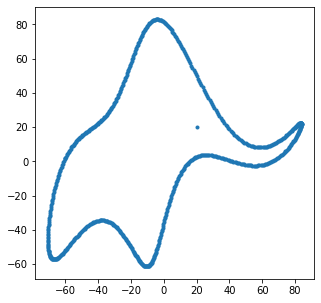

In [2]:
def fourier(t,par,length=np.inf):
  if length==np.inf:
    length=np.size(par)
  A=np.real(par)
  B=np.imag(par)
  f = np.zeros(t.shape)
  for i in range(length):
    f = f+ A[i] * np.cos(i*t) + B[i] * np.sin(i* t)
  return f

# Define the parameters
p1=50-30j
p2= 18+8j
p3=12-10j
p4=-14-60j
p5=40+20j

# Define parameters of the Fourier series
AxBx=np.array([0,p1.real*1j,p2.real*1j,p3.real,0,p4.real])
AyBy=np.array([0,p1.imag*1j+p4.imag,p2.imag*1j,p3.imag*1j,0,0])

t=np.linspace(0,2*np.pi,700)
x=np.append(fourier(t,AxBx),-p5.imag)
y=np.append(fourier(t,AyBy),p5.imag)

plt.figure(figsize=(5,5))
plt.plot(y,-x,'.');

## Truncating the Fourier series

In the following, we truncate the Fourier expansion of $x(t)$ and $y(t)$ at $k=1,...,6$ (just for fun).

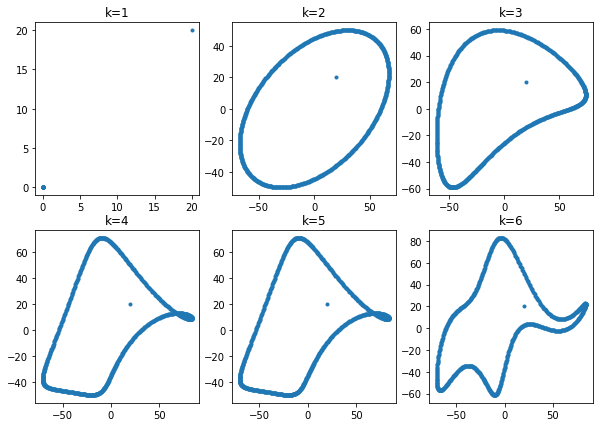

In [3]:
plt.figure(figsize=(10,7))
for i in range(1,7):
  plt.subplot(2,3,i)
  x=np.append(fourier(t,AxBx,i),-p5.imag)
  y=np.append(fourier(t,AyBy,i),p5.imag)
  plt.plot(y,-x,'.')
  plt.title("k=%d" % i);